In [1]:
from keras.models import load_model
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random


Using TensorFlow backend.


In [2]:
pwd

'/home/junior/Downloads'

In [3]:
model = load_model('/home/junior/Documents/seguidor_linha/modelo_9935.h5')

W1010 23:26:36.370105 140251053942592 deprecation_wrapper.py:119] From /home/junior/anaconda3/envs/alpr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1010 23:26:36.727572 140251053942592 deprecation_wrapper.py:119] From /home/junior/anaconda3/envs/alpr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1010 23:26:36.801813 140251053942592 deprecation_wrapper.py:119] From /home/junior/anaconda3/envs/alpr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1010 23:26:36.936822 140251053942592 deprecation_wrapper.py:119] From /home/junior/anaconda3/envs/alpr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.comp

In [4]:
tipos = ['cruzamento', 'curva', 'parada', 'reta', 'zigzag']

In [5]:
os.listdir("/home/junior/Downloads/separado/curva/")

['frame_480_0.046875.jpg',
 'frame_131_-0.375454545455.jpg',
 'frame_622_-0.182840909091.jpg',
 'frame_768_-0.0570454545455.jpg',
 'frame_500_0.259886363636.jpg',
 'frame_769_-0.121818181818.jpg',
 'frame_611_-0.428011363636.jpg',
 'frame_582_0.683011363636.jpg',
 'frame_593_0.181704545455.jpg',
 'frame_410_-0.0551704545455.jpg',
 'frame_246_0.883806818182.jpg',
 'frame_340_0.48.jpg',
 'frame_351_0.479147727273.jpg',
 'frame_588_0.574886363636.jpg',
 'frame_610_0.07625.jpg',
 'frame_753_-0.277159090909.jpg',
 'frame_64_0.575113636364.jpg',
 'frame_525_-0.619545454545.jpg',
 'frame_195_0.137840909091.jpg',
 'frame_230_0.306534090909.jpg',
 'frame_423_-0.655.jpg',
 'frame_802_-0.342840909091.jpg',
 'frame_286_0.319829545455.jpg',
 'frame_178_0.227386363636.jpg',
 'frame_637_-0.316136363636.jpg',
 'frame_498_0.384659090909.jpg',
 'frame_593_-0.0219886363636.jpg',
 'frame_607_-0.746079545455.jpg',
 'frame_568_0.176022727273.jpg',
 'frame_362_-0.423806818182.jpg',
 'frame_156_0.134090909091

In [6]:
predict_img("/home/junior/Downloads/separado/curva/frame_480_0.046875.jpg")

NameError: name 'predict_img' is not defined

In [7]:
def predict_img(img_dir,label=False,invert_color=False):
    tipos = ['cruzamento', 'curva', 'parada', 'reta', 'zigzag']
    aux = []
#     print(img_dir)
    frame = cv2.imread(img_dir,0)
#     img = cv2.resize(frame, (150,150))
    img = frame
    if invert_color:
        img = (255-img)
    aux.append(img)
    img = np.array(aux)
    img = img/255
    img = img.reshape(img.shape[0], img.shape[1], img.shape[2], 1).astype('float32')
    pred = model.predict(img)
    pred = np.around(pred, decimals = 2, out = None) 
    
    return tipos[np.argmax(pred)],pred,frame

    #     vetor

    

In [8]:
pasta = "/home/junior/Downloads/separado"
def analise_erros(invert_color=True,pasta=pasta):
    erro_total = 0
    qtd_img = 0
    vetor_img_erradas = []
    for tipo in tipos:
        pasta_analisada = os.path.join(pasta,tipo)
#         print("\n\n")
#         print("++++ TIPO: ",tipo)
        erros_por_tipo = 0
        frames = os.listdir(pasta_analisada)
        for frame in frames:
            qtd_img +=1
            img_dir = os.path.join(pasta_analisada,frame)
            pred,pred_prob,matriz_frame = predict_img(img_dir,label=True,invert_color=invert_color)
            if pred != tipo:
                vetor_img_erradas.append((matriz_frame,tipo,pred,pred_prob,frame))
#                 print(pred)
                
                erros_por_tipo +=1
        print("Classificou errrado "+str(erros_por_tipo)+" de "+str(len(frames))+" do tipo "+tipo)
        erro_total += erros_por_tipo
    porc_erros = erro_total*100/qtd_img
    porc_acertos = 100-porc_erros
    print("\n"+"Total de erros/Total Imagens: "+str(erro_total)+"/"+str(qtd_img))
    print("Porcentagem de erros: "+str(porc_erros)[:5]+"%")
    print("Porcentagem de Acertos: "+str(porc_acertos)[:5]+"%")
    
    return(vetor_img_erradas)#((frame,tipo,pred,prob))
    

In [9]:
vetor_img_erradas = analise_erros(invert_color=False,pasta="/home/junior/Downloads/separado/")

Classificou errrado 4 de 250 do tipo cruzamento
Classificou errrado 2 de 250 do tipo curva
Classificou errrado 4 de 250 do tipo parada
Classificou errrado 4 de 250 do tipo reta
Classificou errrado 2 de 250 do tipo zigzag

Total de erros/Total Imagens: 16/1250
Porcentagem de erros: 1.28%
Porcentagem de Acertos: 98.72%


In [145]:
vetor_img_erradas

In [146]:
for i i

SyntaxError: invalid syntax (<ipython-input-146-22687fb1c238>, line 1)

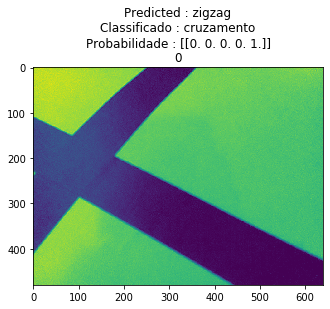

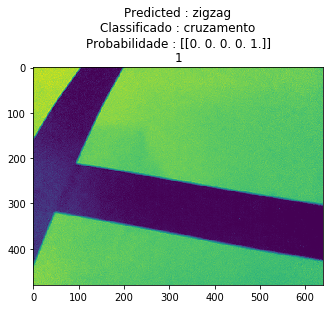

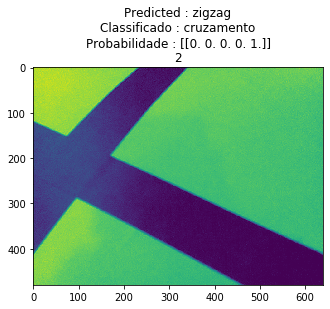

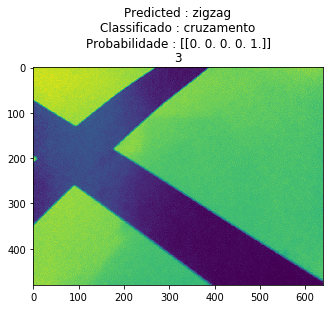

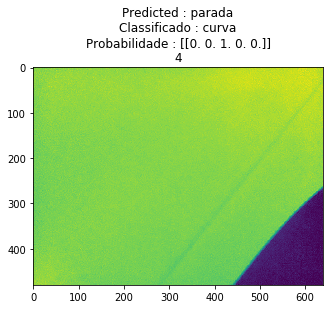

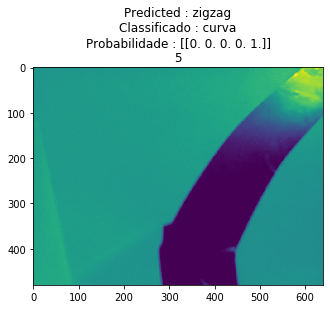

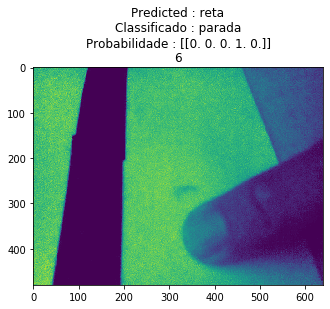

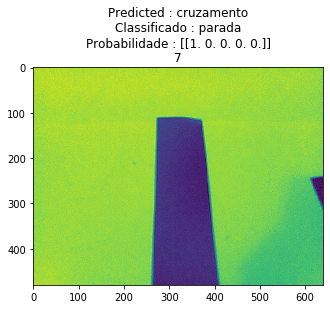

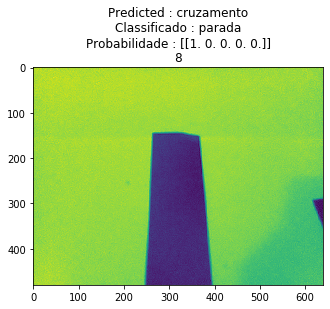

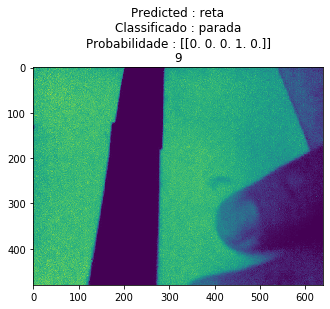

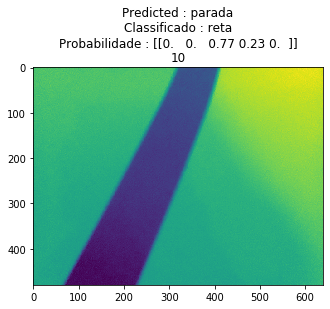

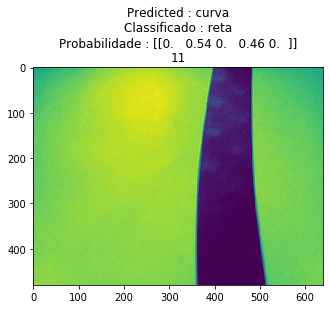

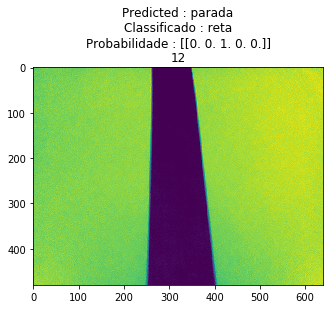

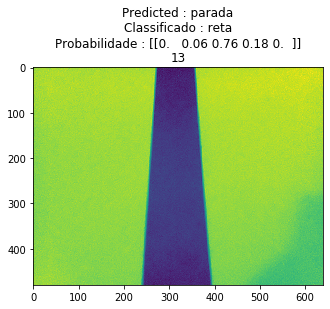

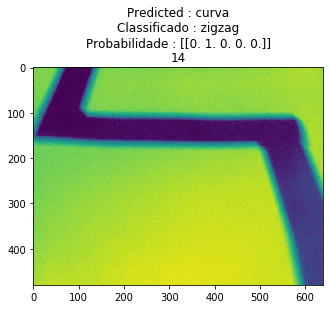

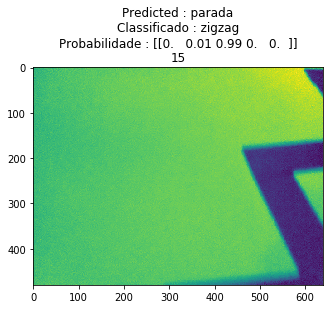

In [25]:
for ind in range(len(vetor_img_erradas)):
        plt.figure()
        plt.title("Predicted : "+str(vetor_img_erradas[ind][2])+"\n"+"Classificado : "+str(vetor_img_erradas[ind][1])+"\n"+"Probabilidade : "+str(vetor_img_erradas[ind][3])+"\n"+str(ind))
        plt.imshow(vetor_img_erradas[ind][0])
    # plt.imshow(vetor_img_erradas[0][0])

In [ ]:
# pasta = "/home/junior/Documents/carro2/fotos/restante"
# for i in range(len(vetor_img_erradas)):
#     x = os.path.join(pasta,vetor_img_erradas[i][1],vetor_img_erradas[i][4])
#     os.remove(x)
#     #     print(vetor_img_erradas[i][1])
# #     print(vetor_img_erradas[i][4])

In [ ]:
np.around(b, decimals = 2, out = None) 

In [ ]:
b